In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.transformations.panel.rocket import MultiRocketMultivariate
#from sktime.transformations.panel.rocket import Rocket #MiniRocketMultivariate
import phate

In [2]:
df = pd.read_csv("Daily.csv")

In [3]:
df.head()

,date,Elevation,ppt_1,ppt_2,ppt_3,ppt_4,ppt_5,ppt_6,ppt_7,ppt_8,...,swe_11,swe_12,swe_13,swe_14,swe_15,swe_16,swe_17,swe_18,swe_19,swe_20
0,1981-10-01,5915.90,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000
1,1981-10-02,5915.90,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000
2,1981-10-03,5915.89,1.713867,2.747555,1.328050,3.702035,1.0892,1.552648,0.974444,3.618103,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000
3,1981-10-04,5915.87,4.569200,15.778116,12.808029,8.325070,16.1904,19.782738,23.672754,20.649353,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.042553
4,1981-10-05,5915.85,2.892400,2.783347,3.057028,2.423404,4.8203,5.012449,5.178000,5.398532,...,0.043269,0.373494,1.333333,0.0,0.196078,0.17561,0.0,0.118519,0.0,0.191489


In [4]:
df2 = df[df.columns[1:]].interpolate()

In [5]:
df2 = (df2-df2.mean())/(df2.std())

In [6]:
df2.shape

(14610, 81)

## Sliding Window approach

In [7]:
data = []
StartDay = 0
EndDay = 4*365+1
for i in range(df2.shape[0]-EndDay):
    if i%4==2:
        days=366 #leap year
    else:
        days=365
        
    newwindow = df2[StartDay:EndDay].to_numpy()
    data.extend([newwindow])
    
    StartDay += 1 #days
    EndDay += 1 #days

In [8]:
len(data)

13149

In [9]:
Data = np.array(data)

In [10]:
Data.shape

(13149, 1461, 81)

In [11]:
Rtransform = MultiRocketMultivariate(num_kernels=168, random_state=0, n_jobs=24)

In [12]:
X_trans = Rtransform.fit_transform(Data)

In [13]:
X_trans.shape

(13149, 1344)

In [14]:
Xtrans = pd.DataFrame(data=X_trans)

In [15]:
Xtrans.to_csv("MRM_Transformed_Daily.csv", index=False, header=False)

In [16]:
pha = phate.PHATE(n_components=2, random_state=0)

In [17]:
X_phate = pha.fit_transform(X_trans)

Calculating PHATE...
  Running PHATE on 13149 observations and 1344 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 25.19 seconds.
    Calculating affinities...
    Calculated affinities in 0.27 seconds.
  Calculated graph and diffusion operator in 26.67 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.09 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.36 seconds.
  Calculated landmark operator in 8.46 seconds.
  Calculating optimal t...
    Automatically selected t = 32
  Calculated optimal t in 2.71 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.32 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.53 seconds.
Calculated PHATE in 47.70 seconds.


In [18]:
Xphate = pd.DataFrame(data=X_phate)

In [19]:
Xphate.to_csv("PHATE_Transformed_Daily.csv", index=False, header=False)

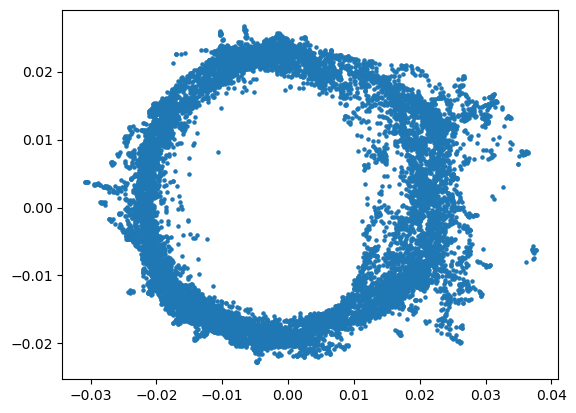

In [20]:
plt.scatter(X_phate.transpose()[0], X_phate.transpose()[1], s=5.0)